In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [4]:
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/signal_to_noise_20/NZ_180709_s07_0610_20_k.csv')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/12mix/12mix_30.csv')
# df = pd.read_csv('/Users/bryan/Studio/seq/data/samples/204.csv')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/signal_to_noise_20/NZ_180521_s06_0610_20.xls') #stn20, 21nt
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/12mix/12mix.csv')
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/signal_to_noise_20/SLZ_200313_09_0610_20.xls')
df.shape

WARNING *** file size (456440) not 512 + multiple of sector size (512)


(1000, 38)

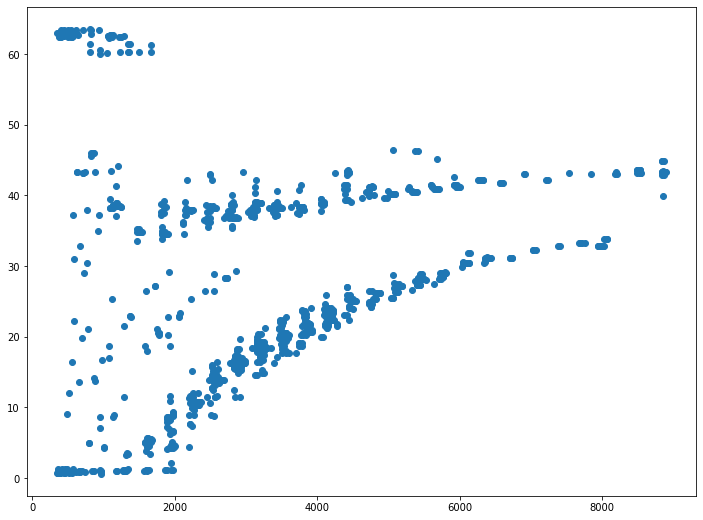

In [5]:
plot_zone(df)

In [7]:
# TAG = 694.2397
TAG = 826.3184

In [8]:
df3_endpoints, df5_endpoints = endpoints(df, tag=TAG)

Input shape (1000, 38) filtered shape (20, 38) by min mass 6000 and min Vol 5000000.0
found 3' ladder ends 2 5' ladder ends 2


In [9]:
df3_endpoints[['Mass', 'RT', 'Vol']], df5_endpoints[['Mass', 'RT', 'Vol']]

(         Mass      RT        Vol
 87  8832.3965  43.314  326492928
 81  8871.3346  43.339   61473152,
           Mass      RT      Vol
 395  7944.1055  32.894  8510383
 388  7983.0491  32.903  7350666)

In [10]:
# endpoint = 10283.489
endpoint = df3_endpoints.sort_values('Vol', ascending=False).iloc[0]['Mass']
df_ms, _ = computational_data_seperation(df, df, endpoint, tag=TAG)
df_ms.shape

df3 163 df5 163
7944.0887
end5p_idxs Int64Index([395], dtype='int64')
df5p_endpoints Mass    7944.11
RT       32.894
Vol     8510383
Name: 395, dtype: object


(163, 38)

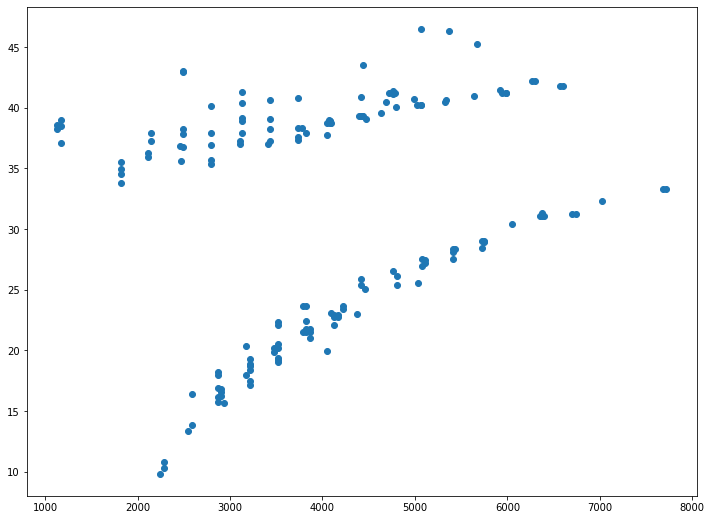

In [11]:
plot_zone(df_ms)

In [14]:
df_label, df_unlabel = label_unlabel_comparison(df, df)

df3_idxs 12 df5_idxs 14


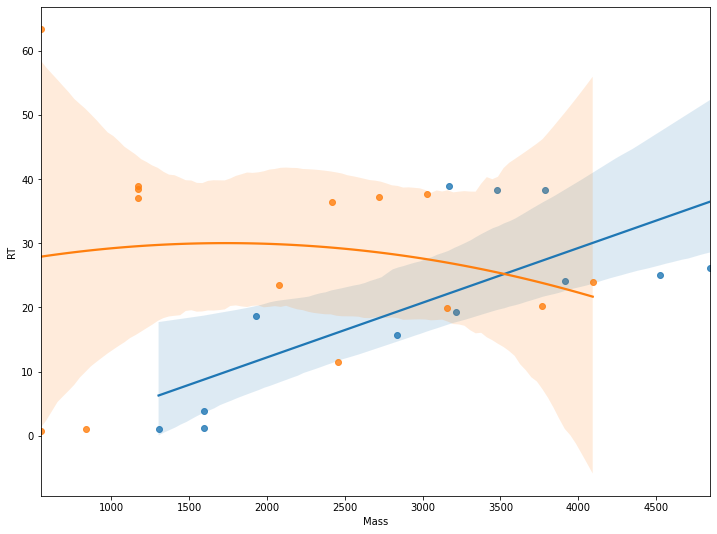

In [111]:
plot_zones(df_label, df_unlabel)

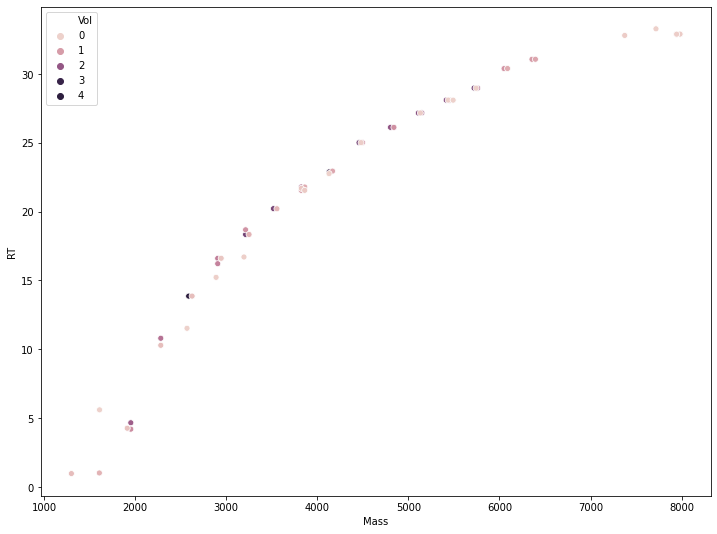

In [144]:
plt.figure(figsize=(12, 9))
df_top = df_5p.sort_values('Vol', ascending=False)[:27*2]
sns.scatterplot(df_top.Mass, df_top.RT, hue=df_top.Vol)

mass_x (54,) mass_y (54,)
df3_idxs 7 df5_idxs 6
df3_idxs 6 df5_idxs 7
df3_idxs 5 df5_idxs 4
df3_idxs 19 df5_idxs 21
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 4 df5_idxs 3
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 3 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 6 df5_idxs 5
          Mass      RT        Vol
87   8832.3965  43.314  326492928
81   8871.3346  43.339   61473152
395  7944.1055  32.894    8510383
388  7983.0491  32.903    7350666


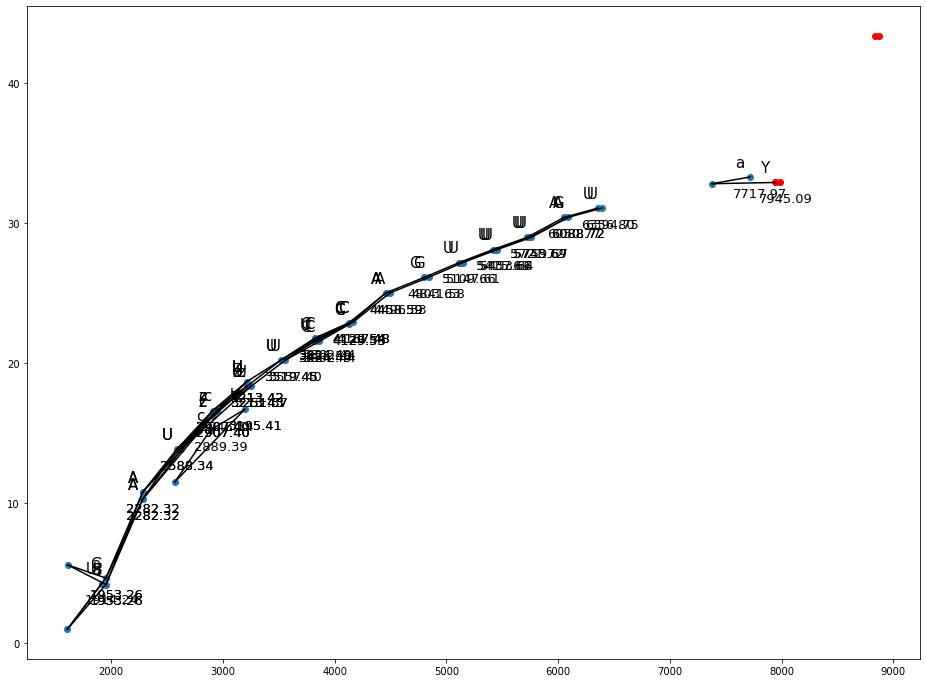

In [145]:
df_bcr, mass_pairs = base_calling_random(df_top)
plot_basecalling(df_bcr, mass_pairs, endpoints=pd.concat([df3_endpoints, df5_endpoints]))
# plt.scatter(df3_endpoints.Mass, df3_endpoints.RT, color='r')

In [59]:
df_top_3p = df_top

In [62]:
df_top_5p = df_top

In [63]:
# missing = 6649.9418
# missing = 6609.9373
# missing = 9977.4835
# missing = 9978.4701
# df_rest5 = df.drop(df_ms.index)
df_paired_3p, df_paired_5p = computational_data_seperation(df_top_3p, df_top_5p, endpoint, ignore_endpoints=True)

df3 30 df5 37


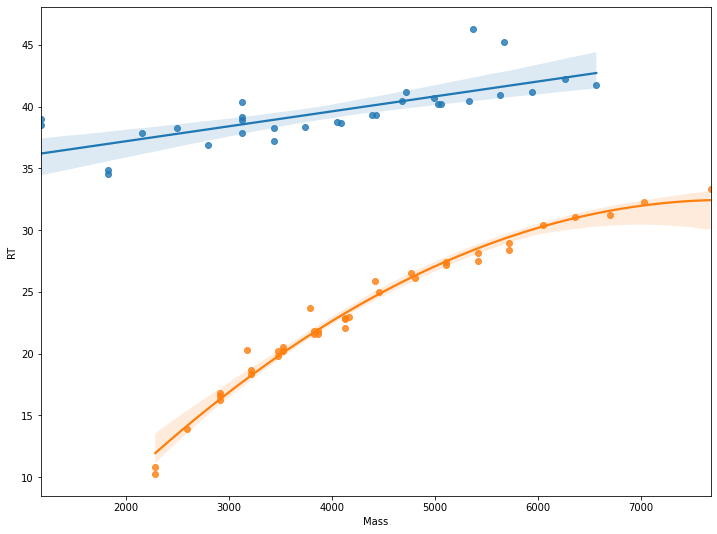

In [110]:
plot_zones(df_paired_3p, df_paired_5p)

mass_x (27,) mass_y (27,)
df3_idxs 3 df5_idxs 3
df3_idxs 5 df5_idxs 4
df3_idxs 2 df5_idxs 2
df3_idxs 8 df5_idxs 10
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 3 df5_idxs 3
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
         Mass      RT        Vol
87  8832.3965  43.314  326492928
81  8871.3346  43.339   61473152


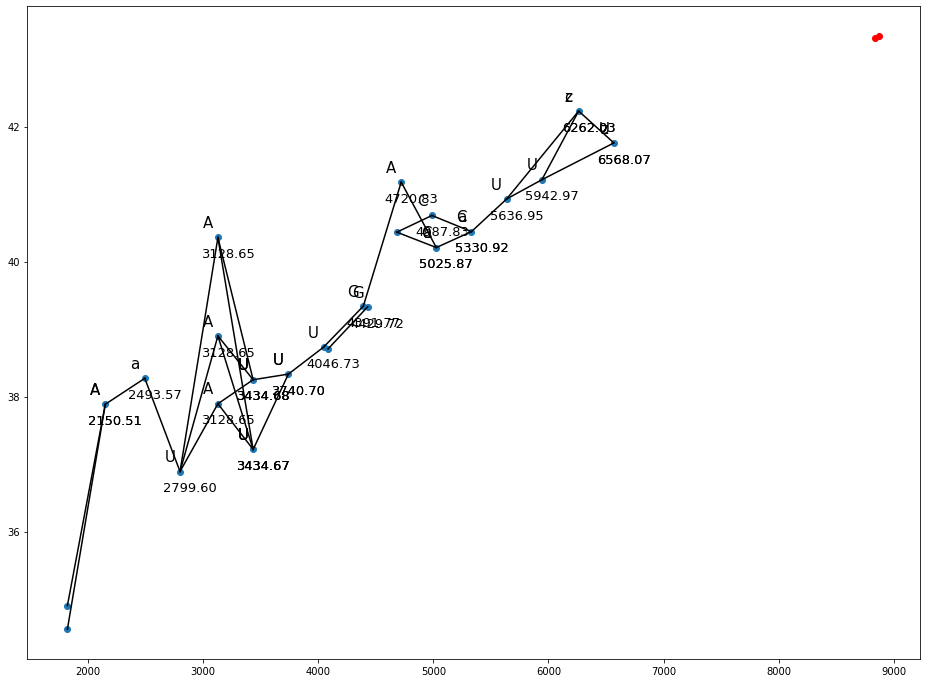

In [68]:
df_paired_3p_top = df_paired_3p.sort_values('Vol', ascending=False).iloc[:27]
bcr_3p = base_calling_random(df_paired_3p_top)
plot_basecalling(*bcr_3p, endpoints=df3_endpoints)
# plt.scatter(df3_endpoints.Mass, df3_endpoints.RT, color='r')

mass_x (27,) mass_y (27,)
df3_idxs 5 df5_idxs 6
df3_idxs 3 df5_idxs 4
df3_idxs 3 df5_idxs 2
df3_idxs 9 df5_idxs 11
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 3 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 5 df5_idxs 3
          Mass      RT      Vol
395  7944.1055  32.894  8510383
388  7983.0491  32.903  7350666


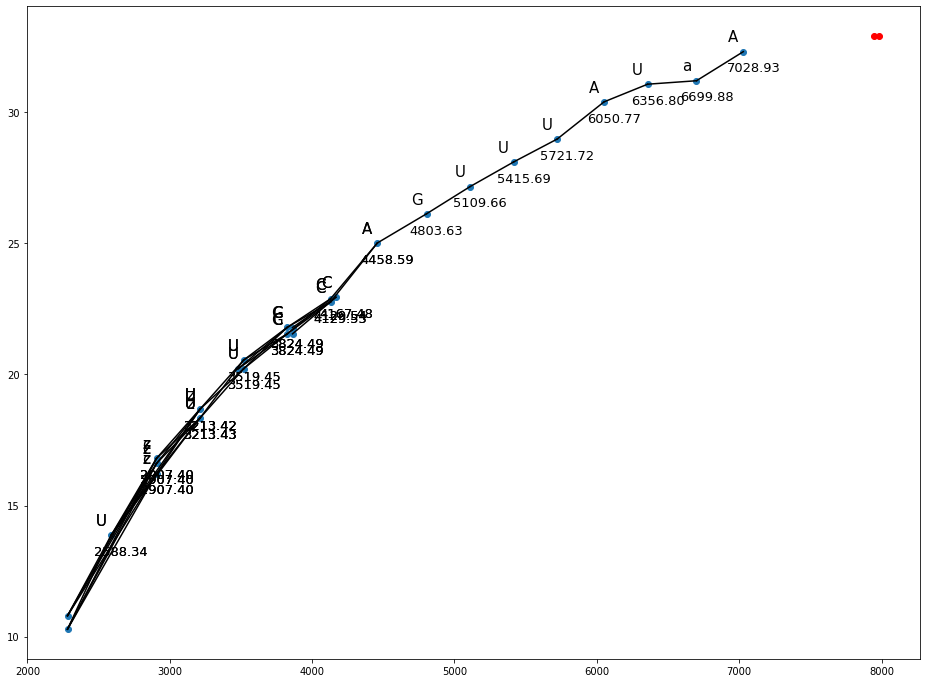

In [69]:
df_paired_5p_top = df_paired_5p.sort_values('Vol', ascending=False).iloc[:27]
bcr_5p = base_calling_random(df_paired_5p_top)
plot_basecalling(*bcr_5p, endpoints=df5_endpoints)

In [126]:
import plotly.graph_objects as go

x = df.Mass
y = df.RT

layout = go.Layout(
        width=1000,
        height=750,
        showlegend=False
    )

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')], layout=layout)


scatter = f.data[0]
# colors = ['#a3a7e4'] * 100
# scatter.marker.color = colors
# scatter.marker.size = [10] * 100
# scatter.marker.opacity = 0.5
# f.layout.dragmode = 'lasso'

idxs_3p = list()

# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs_3p.extend(points.point_inds)
#     c = list(scatter.marker.color)
#     s = list(scatter.marker.size)
#     for i in points.point_inds:
#         c[i] = '#bae2be'
#         s[i] = 20
#         with f.batch_update():
#             scatter.marker.color = c
#             scatter.marker.size = s


scatter.on_selection(update_point)

f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '446ea97…

points [379, 380, 381, 384, 385, 386, 387, 388, 389, 390, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 418, 419, 420, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 435, 436, 437, 438, 439, 441, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 454, 455, 456, 459, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 492, 493, 494, 495, 497, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 575, 576, 577, 578, 579, 582, 583, 584, 586, 588, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 602, 603, 604, 60

In [79]:
df_3p = df.iloc[idxs_3p]

# idxs_5p = [i for i in range(df.shape[0]) if i not in idxs_3p]
# df_5p = df.iloc[idxs_5p]

In [127]:
# idxs_5p = [i for i in range(df.shape[0]) if i not in idxs_3p]
df_5p = df.iloc[idxs_3p]

In [128]:
df_3p.shape, df_5p.shape

((313, 38), (572, 38))

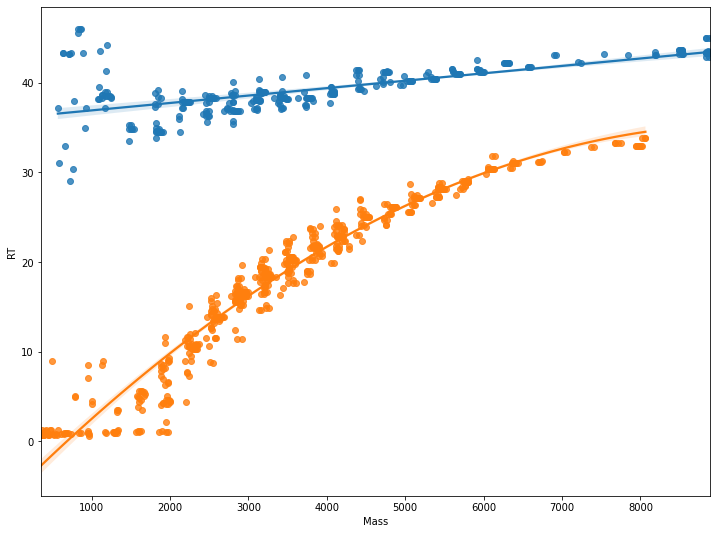

In [129]:
plot_zones(df_3p, df_5p)

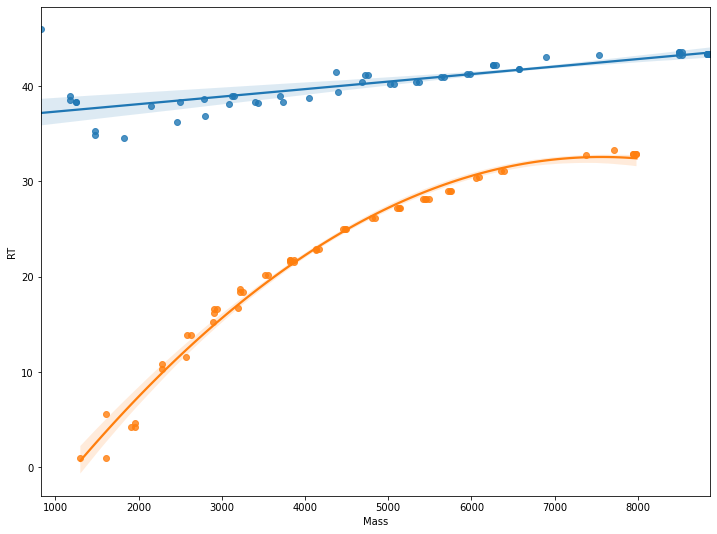

In [146]:
top_N = 54
df_3p_top = df_3p.sort_values('Vol', ascending=False).iloc[:top_N]
df_5p_top = df_5p.sort_values('Vol', ascending=False).iloc[:top_N]
plot_zones(df_3p_top, df_5p_top)

In [ ]:
def conterpart_dots(df, mass_sum):
    df_dst = df.copy()
    df_dst.Mass = mass_sum + 18.0106 - df.Mass 
    return df_dst

In [135]:
df_paired_3p, df_paired_5p = computational_data_seperation(df_3p, df_5p, endpoint, ignore_endpoints=True)

df3 67 df5 76


In [134]:
df_3p.to_excel('~/Notebooks/data/s1_3p.xlsx')
df_5p.to_excel('~/Notebooks/data/s1_5p.xlsx')

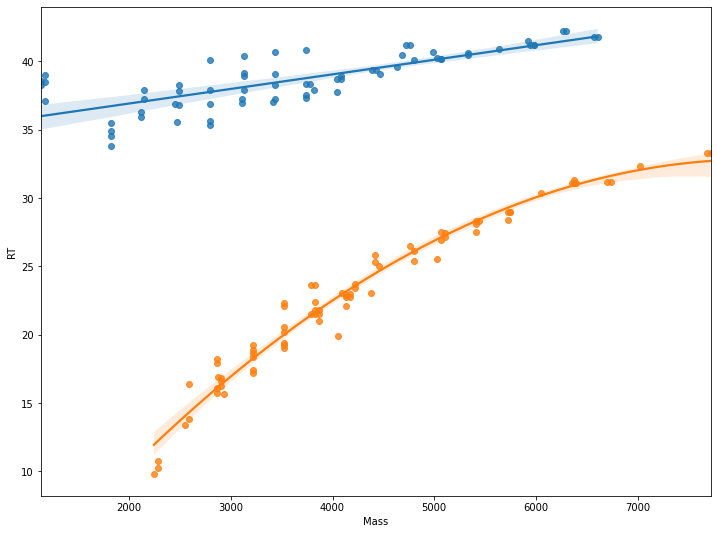

In [136]:
plot_zones(df_paired_3p, df_paired_5p)

mass_x (143,) mass_y (143,)
df3_idxs 16 df5_idxs 19
df3_idxs 32 df5_idxs 29
df3_idxs 19 df5_idxs 14
df3_idxs 52 df5_idxs 54
df3_idxs 2 df5_idxs 4
df3_idxs 0 df5_idxs 0
df3_idxs 9 df5_idxs 5
df3_idxs 4 df5_idxs 5
df3_idxs 0 df5_idxs 0
df3_idxs 13 df5_idxs 10
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 5 df5_idxs 2
df3_idxs 16 df5_idxs 8
          Mass      RT        Vol
87   8832.3965  43.314  326492928
81   8871.3346  43.339   61473152
395  7944.1055  32.894    8510383
388  7983.0491  32.903    7350666


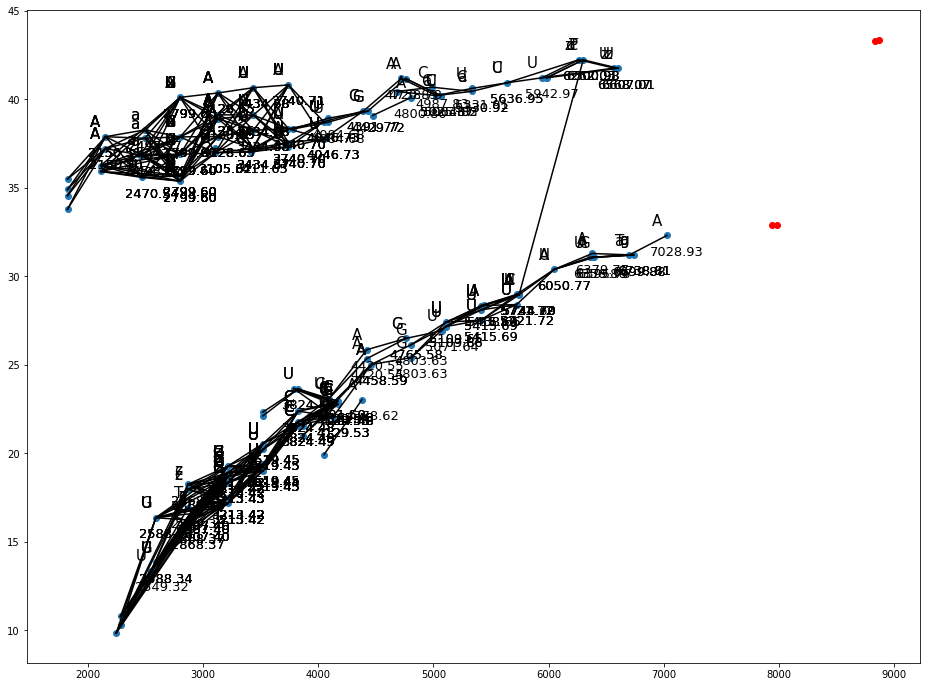

In [137]:
df_bcr, mass_pairs = base_calling_random(pd.concat([df_paired_3p, df_paired_5p]))
plot_basecalling(df_bcr, mass_pairs, endpoints=pd.concat([df3_endpoints, df5_endpoints]))